<a href="https://colab.research.google.com/github/velascogringo/Sales_Prediction/blob/main/Sales_Prediction_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
filename = '/content/drive/MyDrive/WEEK 02/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
# 1) How many rows and columns?
df.shape
#there are 8523 rows and 12 columns

(8523, 12)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# 2) What are the datatypes of each variable?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#3) Are there duplicates? If so, drop any duplicates.
df.duplicated().any() #No dupplicate data found in the dataset

False

In [8]:
df[df.duplicated(keep=False)] #No dupplicate data found in the dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [9]:
#4) Identify missing values.

df.isna().sum() 
#There are 1463 blank/missing data at "Item_Weight" column and 2410 blank/missing data at "Outlet_Size" column

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
df['Item_Weight'].isna().sum()

1463

In [11]:
df['Item_Weight'].dtypes

dtype('float64')

In [12]:
weight_blank = df['Item_Weight'].isna()
weight_blank.sum()

1463

In [7]:
df=df.drop(columns = ['Item_Weight']) 
df.head()
#Missing data for weight is difficult to retrieve and there is not a separate dataset to check and compare to obtain accurate result hence the 'Item_Weight' column has been dropped.

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
df.groupby(['Outlet_Size'])[['Outlet_Type']].value_counts()
#this view shows that the outlet type 'Grocery Store' belongs to Outlet_Size 'Small' 

Outlet_Size  Outlet_Type      
High         Supermarket Type1     932
Medium       Supermarket Type3     935
             Supermarket Type1     930
             Supermarket Type2     928
Small        Supermarket Type1    1860
             Grocery Store         528
dtype: int64

In [16]:
df_OST= df[['Outlet_Size','Outlet_Type']]
df_OST.groupby(['Outlet_Type']).value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small          1083
Supermarket Type1  Small          3715
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64

In [14]:
 #fill all missing data in outlet size with value = "Small" as these missing data is equal to 'Grocery Store' Outlet_type'
df.Outlet_Size = df.Outlet_Size.fillna('Small')
df.Outlet_Size.isna().sum() #check Outlet_Size columm for missing data and there is now zero

0

In [15]:
df.groupby(['Outlet_Size', 'Outlet_Type']).Outlet_Type.value_counts()

Outlet_Size  Outlet_Type        Outlet_Type      
High         Supermarket Type1  Supermarket Type1     932
Medium       Supermarket Type1  Supermarket Type1     930
             Supermarket Type2  Supermarket Type2     928
             Supermarket Type3  Supermarket Type3     935
Small        Grocery Store      Grocery Store        1083
             Supermarket Type1  Supermarket Type1    3715
Name: Outlet_Type, dtype: int64

In [13]:
#6) Confirm that there are no missing values after addressing them.
df.isna().sum() #there is no missing data reflecting in df now

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
# Update category by replacing the value. 'LF' to 'Low Fat'
df.loc[df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
df['Item_Fat_Content'].value_counts() 

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
# Update category by replacing the value. 'low fat' to 'Low Fat'
df.loc[df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
df['Item_Fat_Content'].value_counts() 

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [20]:
# Update category by replacing the value. 'reg' to 'Regular'
df.loc[df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
df['Item_Fat_Content'].value_counts() 

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [21]:
df.dtypes #check all numerical data (floats)

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [ ]:
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [ ]:
df['Outlet_Establishment_Year'].describe() 

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [ ]:
df['Outlet_Establishment_Year'].describe()  

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [ ]:
df['Item_Outlet_Sales'].describe()  

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [24]:
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


In [15]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#import libraries

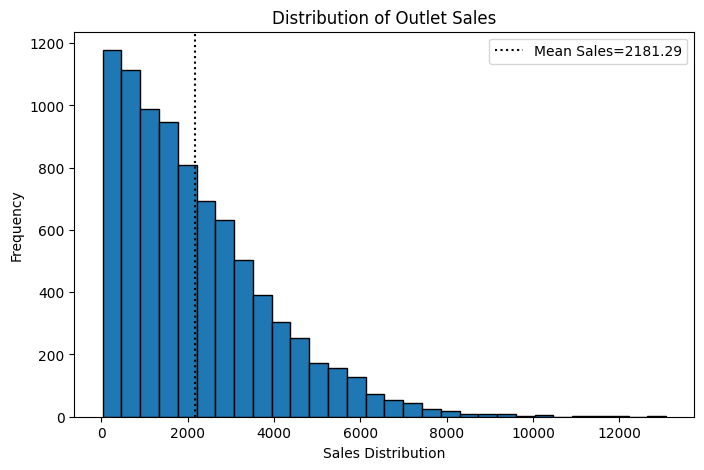

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(df['Item_Outlet_Sales'], bins=30, edgecolor = 'k')
ax.set_xlabel('Sales Distribution')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Outlet Sales')
plt.axvline(df['Item_Outlet_Sales'].mean(), color="k", ls=":", label=f"Mean Sales={round(df['Item_Outlet_Sales'].mean(),2)}")
plt.legend();
plt.show();

#histogram of outlet sales identifying the average sales for all outlets

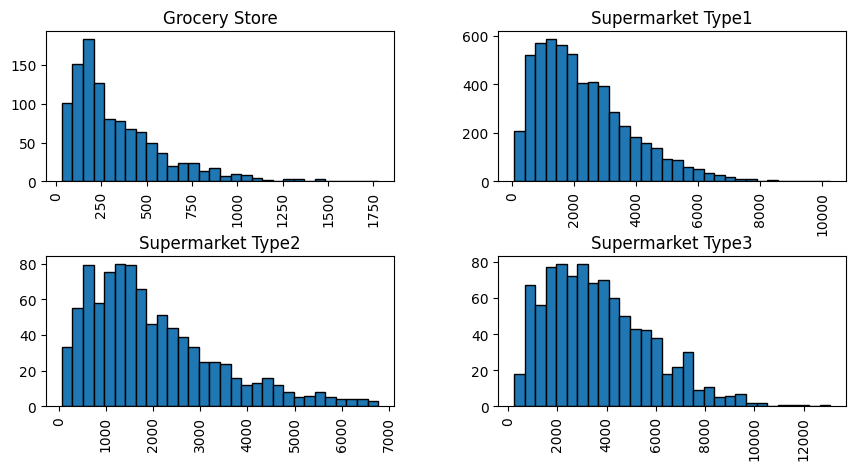

In [14]:
df['Item_Outlet_Sales'].hist(by=df['Outlet_Type'], bins = 30, edgecolor='black', figsize = (10,5));
#histogram visualization for all outlet types

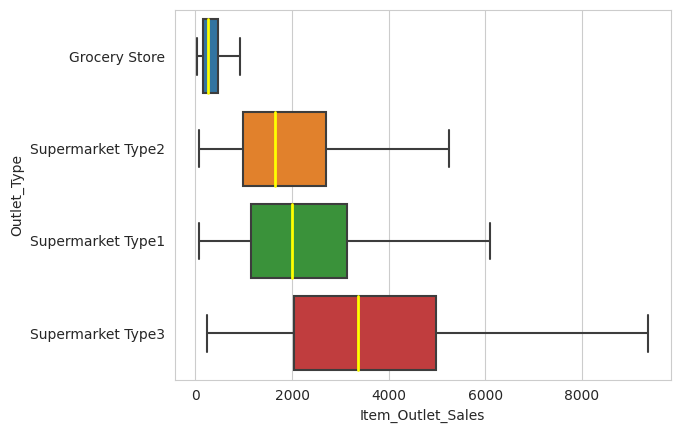

In [40]:
outlet_median=df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].median().sort_values(ascending=True)
sns.boxplot(data=df, x='Item_Outlet_Sales', y='Outlet_Type', order=outlet_median.index,
                        showfliers=False,
                        medianprops = dict(linestyle = '-',
                        linewidth=2, color='Yellow'),
                        );

#boxplot of outlet sales for all outlet type
#horizontal view of boxplot


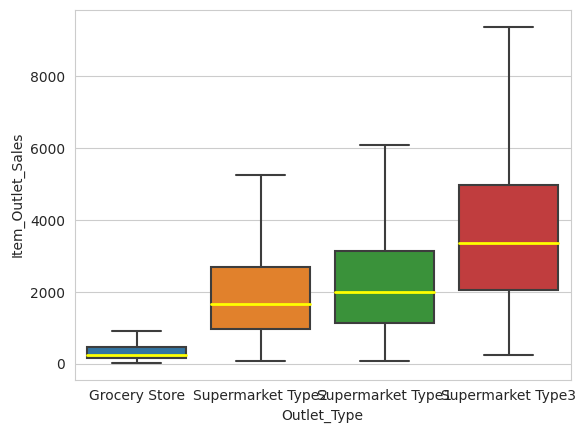

In [44]:
outlet_median=df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].median().sort_values(ascending=True)
sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', order=outlet_median.index,
                        showfliers=False, 
                        medianprops = dict(linestyle = '-',
                        linewidth=2, color='Yellow'),
                        );


#boxplot of outlet sales for all outlet type
#vertical view of boxplot

In [5]:
corr = df.corr()
corr

<ipython-input-5-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [8]:
df_corr = df[['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']]
corr = df_corr.corr()
corr
#check correlation coefficient

,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001315,-0.128625
Item_MRP,-0.001315,1.000000,0.567574
Item_Outlet_Sales,-0.128625,0.567574,1.000000


In [27]:
df_heatmap = df.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type',columns='Item_Type',aggfunc=np.mean)
df_heatmap
#create pivot table for heatmap showing the average sales of each product per outlet

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Outlet_Type,,,,,,,,,,,,,,,,
Grocery Store,292.082544,381.967442,412.831042,352.864879,341.866589,322.285984,319.750450,243.155708,365.901818,367.286612,387.525864,288.094126,228.435980,353.398432,343.602119,300.122154
Supermarket Type1,2102.021249,2346.928355,2228.334688,2348.732970,2392.654389,2259.909110,2399.947642,2231.408037,2127.626505,2407.403432,2260.875454,2244.418022,2640.196610,2406.862759,2126.751624,2550.174048
Supermarket Type2,1780.368782,2022.404489,1874.670867,1867.714110,2083.981362,1995.641420,1951.642279,2247.528955,1876.649134,2065.970392,2057.727270,1853.620490,3166.639914,2111.473733,1923.814626,1947.699988
Supermarket Type3,3248.872417,3565.122748,4584.759327,3779.866814,3915.182245,3553.621470,4114.487061,3432.951643,3318.069783,3821.207782,3862.293911,2700.928667,2687.073686,3745.168739,3284.938836,3512.190114


Text(0.5, 23.52222222222222, 'Type of Item')

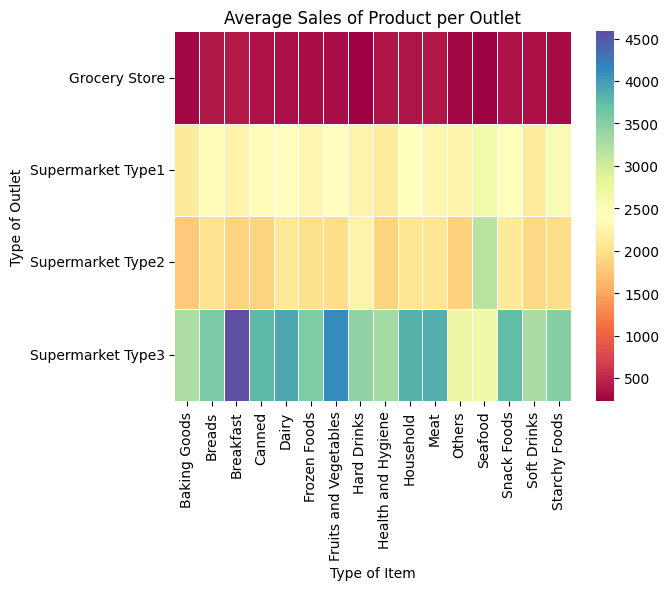

In [28]:
sns.heatmap(df_heatmap, linewidths=.5, cmap="Spectral");
plt.title('Average Sales of Product per Outlet')
plt.ylabel('Type of Outlet', fontsize=10)
plt.xlabel('Type of Item', fontsize=10)
#create heatmap